In [1]:
# math libraries
import numpy as np
import pandas as pd
import scipy

# ML libraries
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sys and helpers
import sys
import os
import glob
from tqdm import tqdm

print('Modules imported.')

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/home/huseyngadirov/miniconda3/envs/credit-card-fraud-detection/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/huseyngadirov/miniconda3/envs/credit-card-fraud-detection/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/huseyngadirov/miniconda3/envs/credit-card-fraud-detection/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/huseyngadirov/miniconda3/envs/credit-card-fraud-detection/lib/python3.5/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/home/huseyngadirov/miniconda3/envs/credit-card-fraud-detection/lib/python3.5/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: libcuda.so.1: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [137]:
# loading the dataset
data = pd.read_csv('data/creditcard.csv')
print('Dataset loaded with a shape of {0}'.format(data.shape))

Dataset loaded with a shape of (284807, 31)


In [68]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [69]:
# check for missing values
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [70]:
# sample only a fraction of the dataset
sam_data = data.sample(frac = 0.8, random_state = 1)
print('Dataset shape after sampling is {0}.'.format(sam_data.shape))

Dataset shape after sampling is (227846, 31).


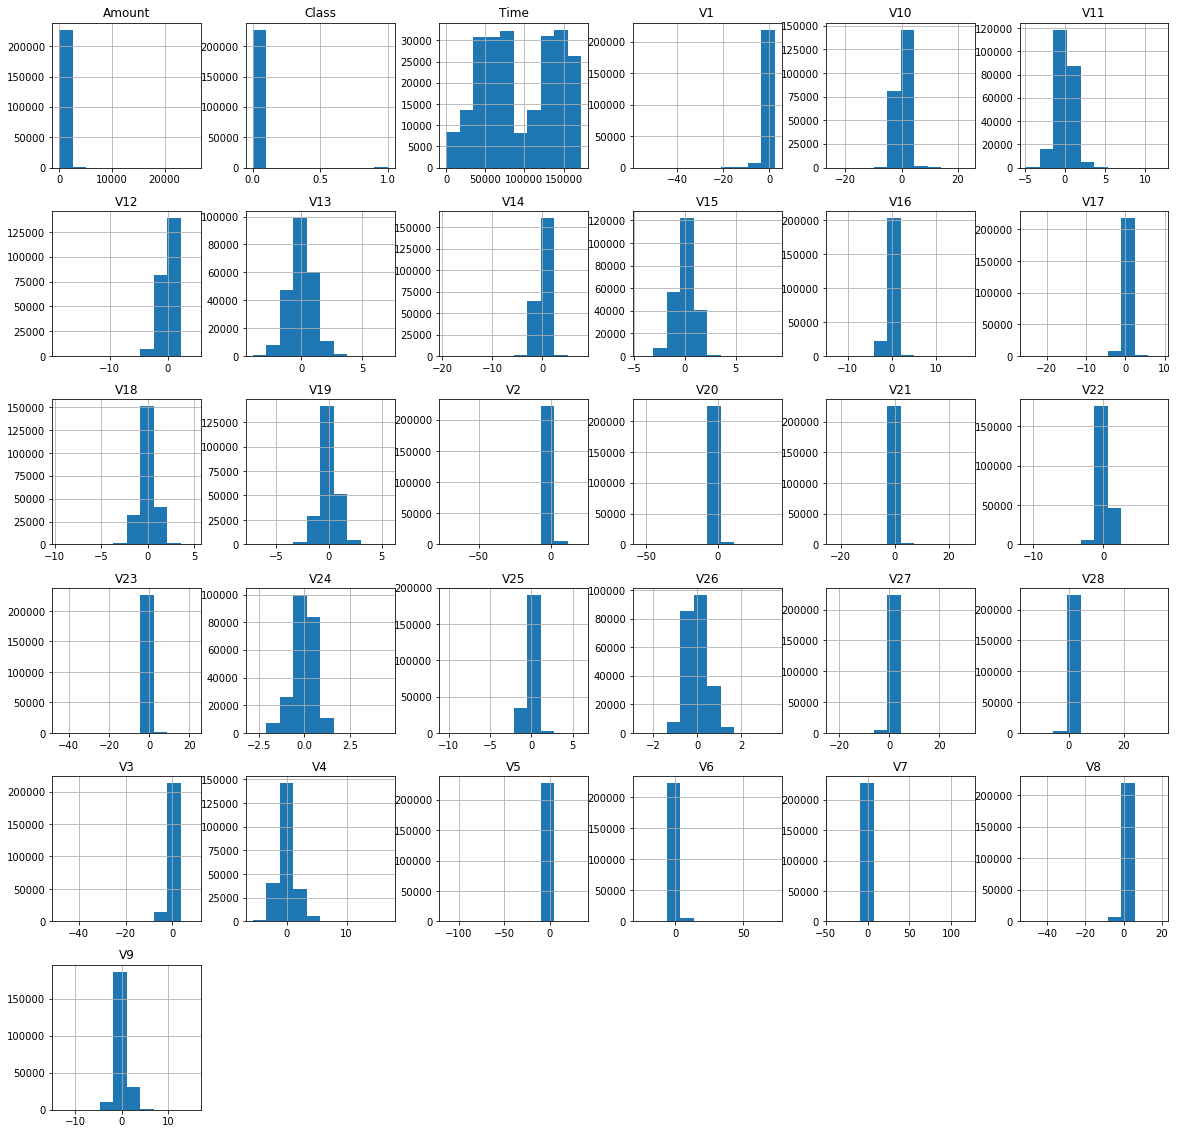

In [71]:
# analysis plots
sam_data.hist(figsize = (20, 20))
plt.show()

In [72]:
fraud = len(sam_data[sam_data['Class'] == 1])
valid = len(sam_data[sam_data['Class'] == 0])

outlier_fraction = round(float(fraud / valid), 5)

print('There are {0} valid and {1} fraud cases in the sample.'.format(valid, fraud))
print('Outlier fraction is {0}.'.format(outlier_fraction))

There are 227448 valid and 398 fraud cases in the sample.
Outlier fraction is 0.00175.


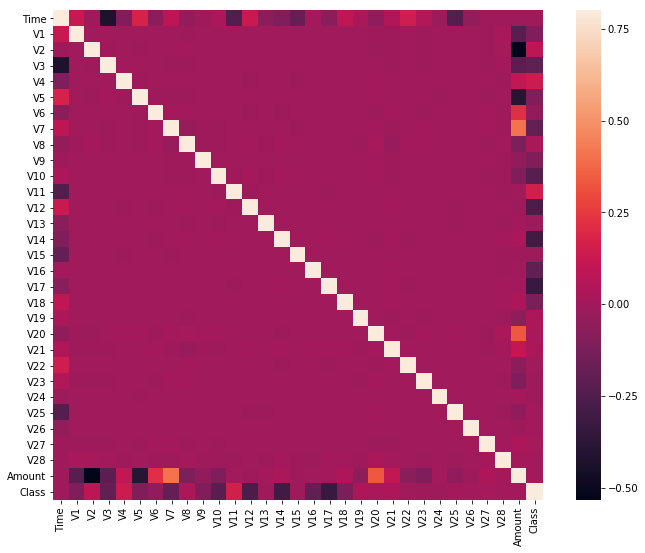

In [73]:
# correlation matrix
corrmat = sam_data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

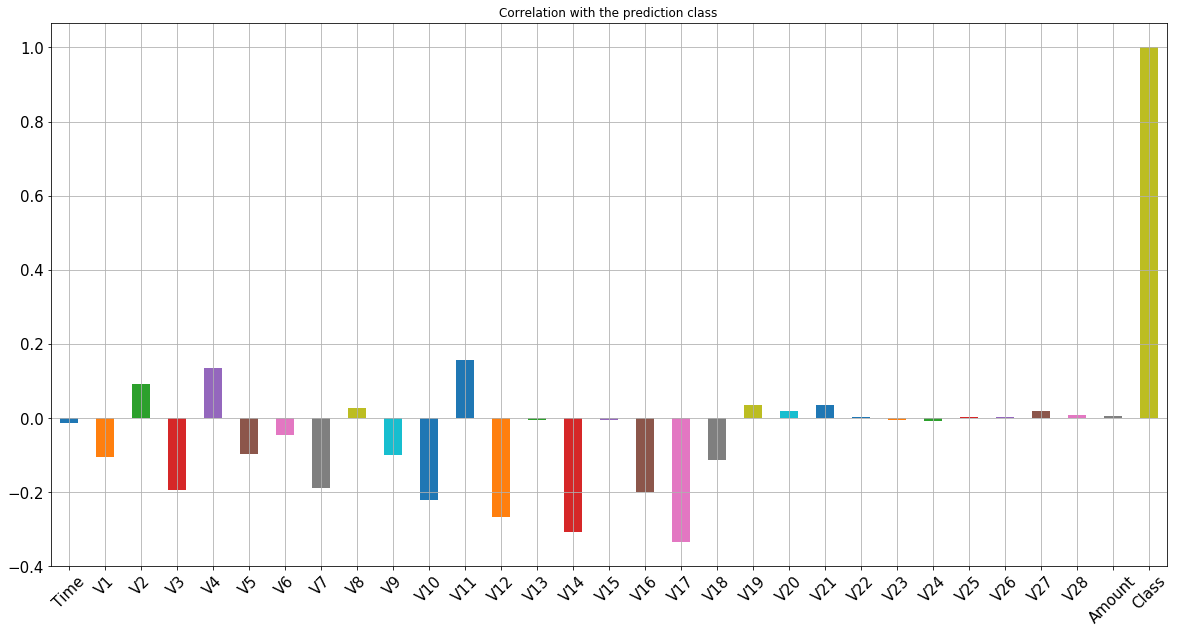

In [74]:
sam_data.corrwith(data['Class']).plot.bar(
        figsize = (20, 10), title = "Correlation with the prediction class", fontsize = 15,
        rot = 45, grid = True)

In [75]:
# feature scaling
sam_data['normalizedAmount'] = StandardScaler().fit_transform(sam_data['Amount'].values.reshape(-1,1))
sam_data.drop('Time', axis=1, inplace=True)
sam_data.drop('Amount', axis=1, inplace=True)
sam_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,0,-0.342725
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,0,-0.341974
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0,-0.346283
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,0,-0.286638
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0,-0.346797


In [76]:
columns = sam_data.columns.tolist()
columns = [c for c in columns if c != 'Class']

x = sam_data[columns]
y = sam_data['Class']

In [77]:
y.shape

(227846,)

## Training

In [105]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state=42)

### Decision Trees

In [106]:
classifierDT = DecisionTreeClassifier(random_state = 42, criterion = 'gini',  splitter='best', 
                                    min_samples_leaf=1, min_samples_split=2)

In [107]:
# training
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [122]:
# predicitons
y_predDT = classifierDT.predict(X_test)

In [123]:
# assessment
accDT = accuracy_score(y_test, y_predDT)
precDT = precision_score(y_test, y_predDT)
recDT = recall_score(y_test, y_predDT)
f1DT = f1_score(y_test, y_predDT)

resultsOverall = pd.DataFrame([['Decision Trees', accDT, precDT, recDT, f1DT]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
resultsOverall.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Trees,0.998947,0.638298,0.810811,0.714286


### Random Forestss

In [126]:
classifierRF = RandomForestClassifier(random_state = 42, n_estimators = 200,
                                    criterion = 'entropy')

In [127]:
# training
classifierRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [128]:
# predictions
y_predRF = classifierRF.predict(X_test)

In [130]:
# assessment
accRF = accuracy_score(y_test, y_predRF)
precRF = precision_score(y_test, y_predRF)
recRF = recall_score(y_test, y_predRF)
f1RF = f1_score(y_test, y_predRF)
model_resultsRF = pd.DataFrame([['Random Forest (n=200)', accRF, precRF, recRF, f1RF]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
resultsOverall = resultsOverall.append(model_resultsRF, ignore_index = True)
resultsOverall.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Trees,0.998947,0.638298,0.810811,0.714286
1,Random Forest (n=100),0.999693,1.000000,0.810811,0.895522
2,Random Forest (n=200),0.999693,1.000000,0.810811,0.895522
3,Random Forest (n=200),0.999693,1.000000,0.810811,0.895522


### Neural Networks

In [133]:
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.model.validation_data[0]))).round()
        val_targ = self.model.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict)
        _val_recall = recall_score(val_targ, val_predict)
        _val_precision = precision_score(val_targ, val_predict)
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print('F1: {0}, Precision: {1}, Recall: {2}'.format(_val_f1, _val_precision, _val_recall))
        return
 
metrics = Metrics()

NameError: name 'Callback' is not defined

In [ ]:
# Initialising the ANN
model = Sequential()

model.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))

model.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.summary()

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 32, epochs = 100)